In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import getpass
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Reading in dataframe

In [2]:
df = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Sarah Ido folder\data\CCK\CCK click stream data\phet_cck_user_actions+sophistication_WITHPAUSE.csv')
df["Student#"] = df["Student#"].astype('category')
df["Family"]=df["Family"].str.capitalize()

## Getting a sense of the data

In [3]:
actions = [np.mean([  df[ (df['Student#']==student) & 
            (df['Activity']=='a'+str(activity)) ].shape[0] for student in set(df['Student#'])  ]) for activity in [1,2,3]]
'''There are {0} students with an average number of actions of: {1:.2f} actvity 1, {2:.2f} for actvity 2, {3:.2f} for actvity 3'''.format(len(set(df['Student#'])), actions[0],actions[1],actions[2])

'There are 96 students with an average number of actions of: 537.94 actvity 1, 407.00 for actvity 2, 81.83 for actvity 3'

In [4]:
df.head()

,Activity,Student#,Time Stamp,Family,Action,Component,Outcome,#circuits,#loops,#components,#battery,#circuitSwitch,#grabBagResistor,#lightBulb,#resistor,#seriesAmmeter
0,a1,10009106,1363978501425,Build,add,lightBulb,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a1,10009106,1363978503940,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a1,10009106,1363978506034,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a1,10009106,1363978508034,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a1,10009106,1363978509800,Organize,organizeWorkspace,lightBulb,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's look at sequence of action types for Activity 2
For each student we want to find the number of transitions from one type of actions to another

In [5]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(df2['Family']):
    actionTypes[family] = list(set(df2[df2['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,','.join(list(set(df2[df2['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Reset:	 reset
Pause:	 pause
Extra:	 moreVoltsOption,join,remove,changeResistance,sliderEndDrag,add,organizeWorkspace,joinX
Test:	 startMeasure,playPause,traceMeasure,endMeasure
Organize:	 organizeWorkspace
Build:	 join,reverse,switch,changeResistance,sliderEndDrag,add,changeVoltage,joinX
Interface:	 deiconified,help,iconified,exitSim,enableComponent,disableComponent,view
Revise:	 join,reverse,switch,remove,changeResistance,sliderEndDrag,add,split,changeVoltage,joinX


First, we find what actions students are doing in consecutively. We count the number of succesive actions for each pair and normalize by the number of times the first action is done in total.

In [38]:
families = actionTypes.keys()
data = np.zeros((len(families),len(families)), dtype='float')
data_blocks = np.zeros((len(families),len(families)), dtype='float')
sequence = list(df2['Family'])
def get_i(family): return families.index(family)
for i,family in enumerate(sequence):
    if i +1 < len(sequence):
        data[get_i(family)][get_i(sequence[i+1])] += 1
        if families.index(family) != families.index(sequence[i+1]):
            data_blocks[get_i(family)][get_i(sequence[i+1])] += 1
data = data / sum(data); data_blocks = data_blocks / sum(data_blocks)
df_actions = pd.DataFrame(data);df_actions.columns = families;df_actions.index = families
df_actions_blocks = pd.DataFrame(data_blocks);df_actions_blocks.columns = families;df_actions_blocks.index = families
df_actions

,Reset,Pause,Extra,Interface,Organize,Build,Test,Revise
Reset,8.93e-03,6.90e-03,2.52e-03,8.96e-03,0.00e+00,3.91e-03,3.11e-03,1.62e-03
Pause,5.27e-01,1.84e-02,3.02e-02,1.12e-01,3.16e-02,1.44e-02,3.42e-02,3.88e-02
Extra,2.68e-02,1.15e-02,5.04e-01,2.34e-02,9.15e-03,2.85e-03,1.67e-03,5.17e-03
Interface,2.68e-02,8.21e-02,1.49e-01,3.94e-01,1.17e-02,1.46e-02,2.79e-02,2.00e-02
Organize,1.16e-01,6.98e-02,1.49e-01,8.75e-02,3.10e-01,2.56e-01,1.89e-02,3.02e-01
Build,8.04e-02,6.52e-02,3.78e-02,4.34e-02,3.77e-01,5.98e-01,1.44e-02,1.30e-01
Test,1.16e-01,5.15e-01,3.53e-02,1.66e-01,6.02e-02,2.23e-02,8.43e-01,8.00e-02
Revise,9.82e-02,2.31e-01,9.32e-02,1.65e-01,2.01e-01,8.75e-02,5.69e-02,4.22e-01


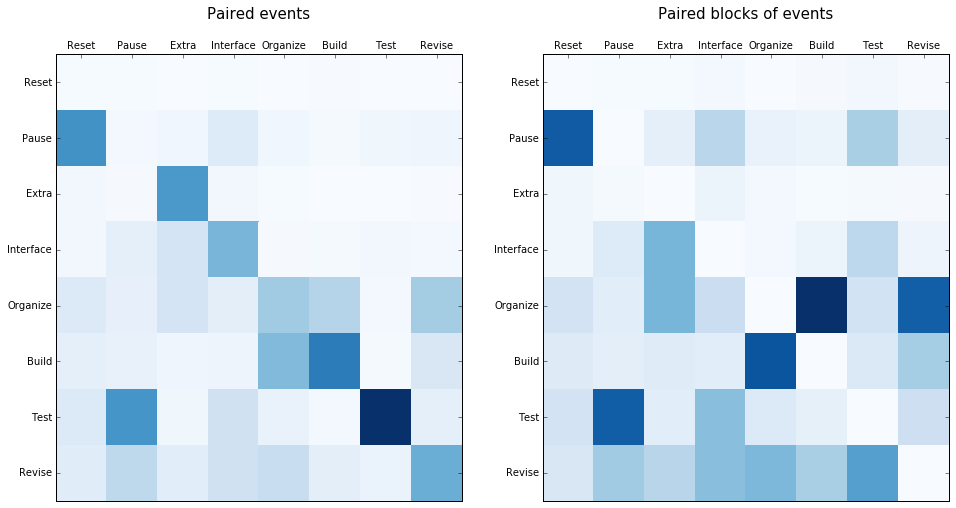

In [29]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax = axs[0]
heatmap = ax.pcolor(df_actions, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(df_actions.columns, minor=False)
ax.set_yticklabels(df_actions.index, minor=False)
plt.text(0.5, 1.08, "Paired events",fontsize=15,horizontalalignment='center',transform = ax.transAxes)
ax = axs[1]
heatmap = ax.pcolor(df_actions_blocks, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(df_actions_blocks.columns, minor=False)
ax.set_yticklabels(df_actions_blocks.index, minor=False)
plt.text(0.5, 1.08, "Paired blocks of events",fontsize=15,horizontalalignment='center',transform = ax.transAxes)
plt.show()